In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:


columns = ['customer_no','create_dt','max_purchase_date','recency','frequency','revenue','subscriber']
df = pd.read_csv('/content/rmf_data.csv',names= columns)
df['recency'][df['recency']< 0] = df['recency'].mean()
df.loc[df['frequency'] > 180, 'frequency'] = np.nan
df['frequency'] = df['frequency'].interpolate()
df.loc[df['revenue'] > 200000, 'revenue'] = np.nan
df['revenue'] = df['revenue'].interpolate()
df.head()


<ipython-input-29-fb7ef98796d5>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customer_no,create_dt,max_purchase_date,recency,frequency,revenue,subscriber
0,308653,2023-05-31,2018-07-05 17:32:19.000,1800.0,1.0,400.0,N
1,322287,2023-05-31,2018-11-30 22:20:14.000,1652.0,1.0,130.0,N
2,212088,2023-05-31,2018-10-02 00:00:00.000,1711.0,5.0,0.0,N
3,365143,2023-05-31,2019-08-08 12:48:16.093,1401.0,1.0,298.0,N
4,478967,2023-05-31,2022-11-18 17:54:10.353,203.0,1.0,230.0,N


In [ ]:
df['revenue'] = df['revenue'].div(10)

In [ ]:
df.describe()

,customer_no,recency,frequency,revenue
count,102901.000000,102901.000000,102901.000000,102901.000000
mean,348591.456993,849.915675,3.337747,156.446392
std,93971.556202,622.683845,6.484483,921.566124
min,5257.000000,0.000000,1.000000,-62.800000
25%,306410.000000,239.000000,1.000000,11.400000
50%,359530.000000,762.000000,1.000000,22.800000
75%,428675.000000,1464.000000,3.000000,41.000000
max,489274.000000,1826.000000,178.000000,19919.100000


In [ ]:
mean_recency = df['recency'].mean()

# Replace NaN values in the 'recency' column with the mean value
df['recency'].fillna(mean_recency, inplace=True)

In [ ]:
nan_values = df['frequency'].isnull()

# Filter the DataFrame to show only rows with NaN values in the 'recency' column
rows_with_nan = df[nan_values]

# Display the rows with NaN values in the 'recency' column
print(rows_with_nan)

Empty DataFrame
Columns: [customer_no, create_dt, max_purchase_date, recency, frequency, revenue, subscriber]
Index: []


In [ ]:
df.recency.describe()

count    102949.000000
mean        851.399667
std         621.663717
min           0.000000
25%         238.000000
50%         763.000000
75%        1464.000000
max        1826.000000
Name: recency, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

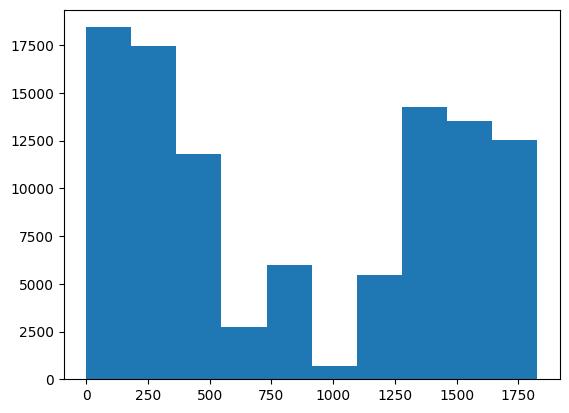

In [ ]:
plt.hist(df['recency'])
plt.show

In [ ]:
df.frequency.describe()

count    102949.00000
mean          8.74262
std          45.32571
min           1.00000
25%           1.00000
50%           1.00000
75%           2.00000
max        1650.00000
Name: frequency, dtype: float64

In [ ]:
df.loc[df['frequency'] > 180, 'frequency'] = np.nan

In [ ]:
df['frequency'] = df['frequency'].interpolate()

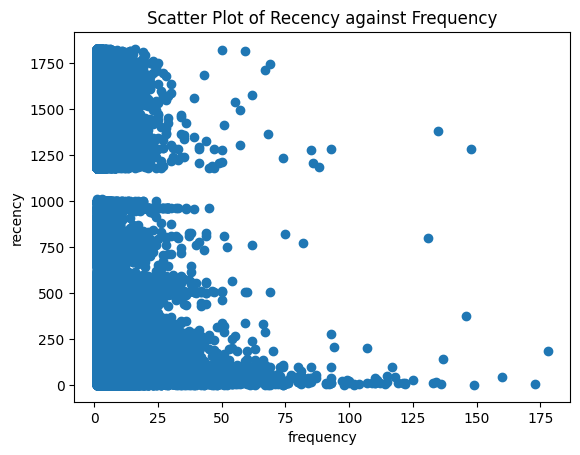

In [ ]:
plt.scatter(df['frequency'], df['recency'])

# Set axis labels and title
plt.xlabel('frequency')
plt.ylabel('recency')
plt.title('Scatter Plot of Recency against Frequency')

# Display the plot
plt.show()

In [ ]:
plot_data = [
    go.Histogram(
        x=df['frequency']
    )
]

plot_layout = go.Layout(
        title='Frequency'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



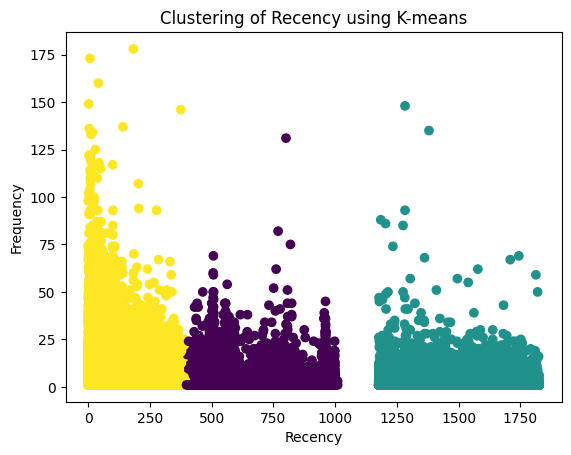

In [ ]:

from sklearn.cluster import KMeans


# Extract the 'recency' column as a separate DataFrame
recency_data = df[['recency']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters as per your requirements
kmeans.fit(recency_data)

# Add the cluster labels as a new column in the DataFrame
df['recency_cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df['recency'], df['frequency'], c=df['recency_cluster'])
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Clustering of Recency using K-means')

# Display the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-4-8ede279c48ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recency_data["clusters"] = kmeans.labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-4-8ede279c48ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

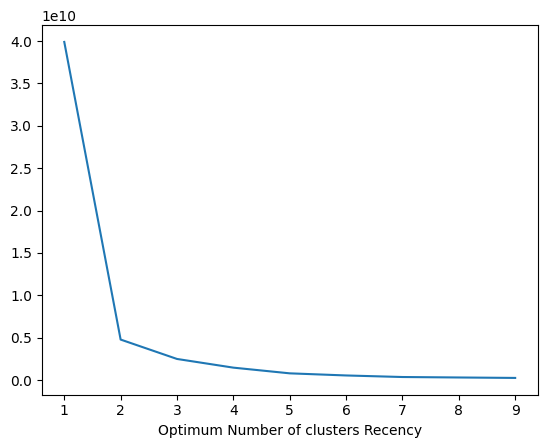

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-4-8ede279c48ad>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recency_data["clusters"] = kmeans.labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-4-8ede279c48ad>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

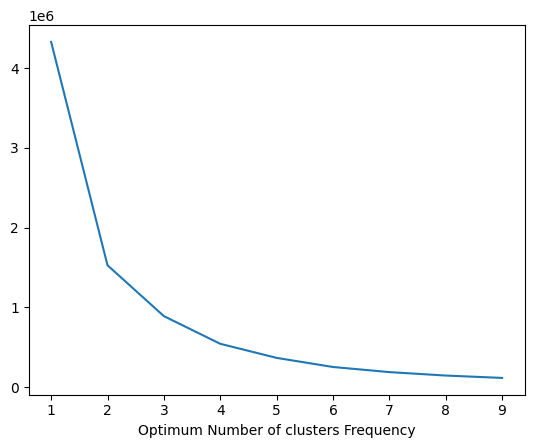

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-4-8ede279c48ad>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recency_data["clusters"] = kmeans.labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-4-8ede279c48ad>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

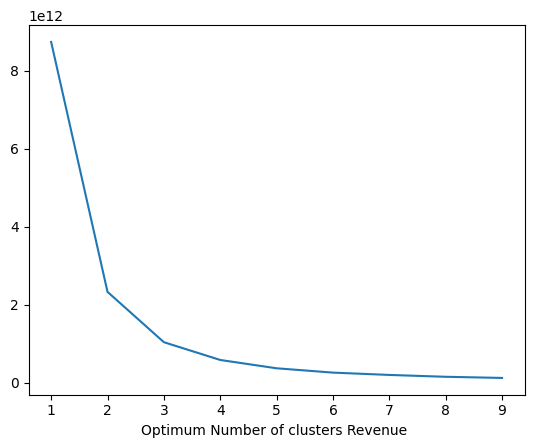

In [ ]:
sse={}
recency_data = df[['recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(recency_data)
    recency_data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Optimum Number of clusters Recency")
plt.show()

sse={}
frequency_data = df[['frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(frequency_data)
    recency_data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Optimum Number of clusters Frequency")
plt.show()

sse={}
revenue_data = df[['revenue']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(revenue_data)
    recency_data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Optimum Number of clusters Revenue ")
plt.show()

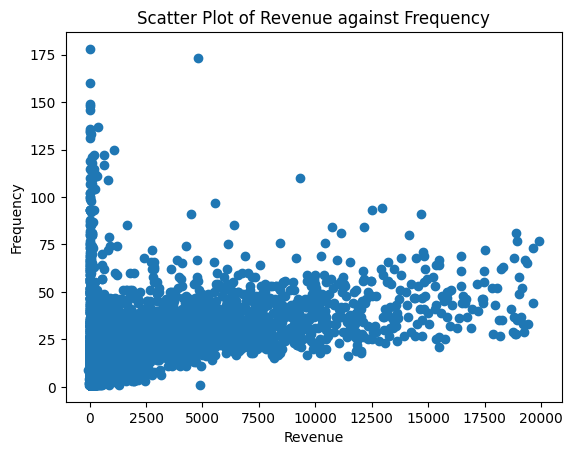

In [ ]:
plt.scatter(df['revenue'], df['frequency'])

# Set axis labels and title
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Revenue against Frequency')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



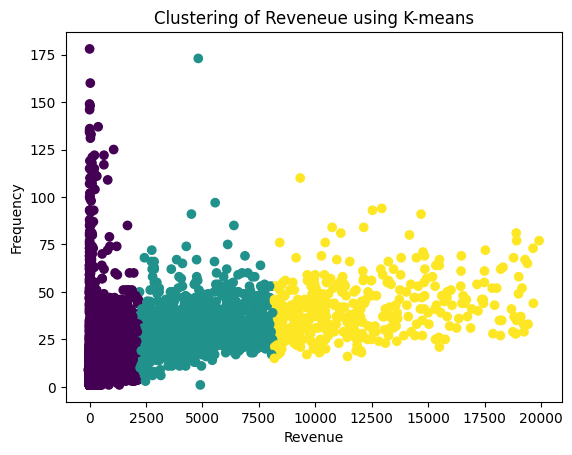

In [ ]:
# Clustering for revenue
revenue_data = df[['revenue']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters as per your requirements
kmeans.fit(revenue_data)

# Add the cluster labels as a new column in the DataFrame
df['revenue_cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df['revenue'], df['frequency'], c=df['revenue_cluster'])
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Clustering of Reveneue using K-means')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



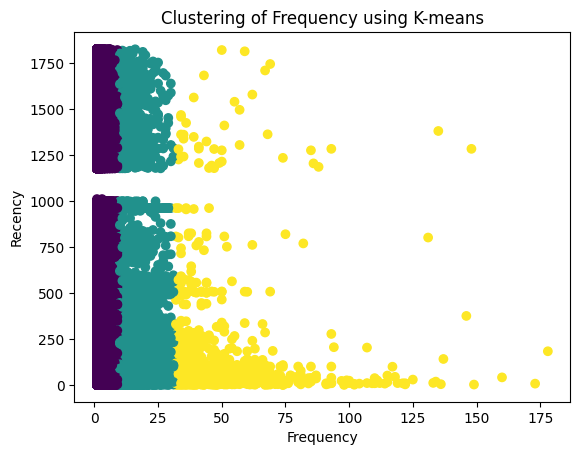

In [ ]:
#clustering for frequency
frequency_data = df[['frequency']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters as per your requirements
kmeans.fit(frequency_data)

# Add the cluster labels as a new column in the DataFrame
df['frequency_cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df['frequency'], df['recency'], c=df['frequency_cluster'])
plt.xlabel('Frequency')
plt.ylabel('Recency')
plt.title('Clustering of Frequency using K-means')

# Display the plot
plt.show()

In [ ]:
#calculate overall score and use mean() to see details
df['overall_score'] = df['recency_cluster'] + df['frequency_cluster'] + df['revenue_cluster']
#df.groupby('overall_score')['recency','frequency','revenue'].median()

In [ ]:
df['Segment'] = 'Low-Value'
df.loc[df['overall_score']>2,'Segment'] = 'Mid-Value'
df.loc[df['overall_score']>4,'Segment'] = 'High-Value'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/rfm_data_with_new_labels.csv')
df.head()

,Unnamed: 0,customer_no,create_dt,max_purchase_date,recency,frequency,revenue,subscriber,recency_cluster,revenue_cluster,frequency_cluster,overall_score,Segment
0,0,308653,2023-05-31,2018-07-05 17:32:19.000,1800.0,1.0,40.0,N,1,0,0,1,1
1,1,322287,2023-05-31,2018-11-30 22:20:14.000,1652.0,1.0,13.0,N,1,0,0,1,1
2,2,212088,2023-05-31,2018-10-02 00:00:00.000,1711.0,5.0,0.0,N,1,0,0,1,1
3,3,365143,2023-05-31,2019-08-08 12:48:16.093,1401.0,1.0,29.8,N,1,0,0,1,1
4,4,478967,2023-05-31,2022-11-18 17:54:10.353,203.0,1.0,23.0,N,2,0,0,2,2


In [ ]:
#df["Segment"] = df["overall_score"].astype(str)
# Create a 3D scatter plot
fig = px.scatter_3d(df, x='recency', y='frequency', z='revenue', color='Segment',width=1600, height=800)


# Set labels for the axes
fig.update_layout(scene=dict(
    xaxis_title='Recency',
    yaxis_title='Frequency',
    zaxis_title='Revenue'
))

# Show the plot
fig.show()

In [ ]:
df.to_csv("rfm_data_with_new_labels.csv")

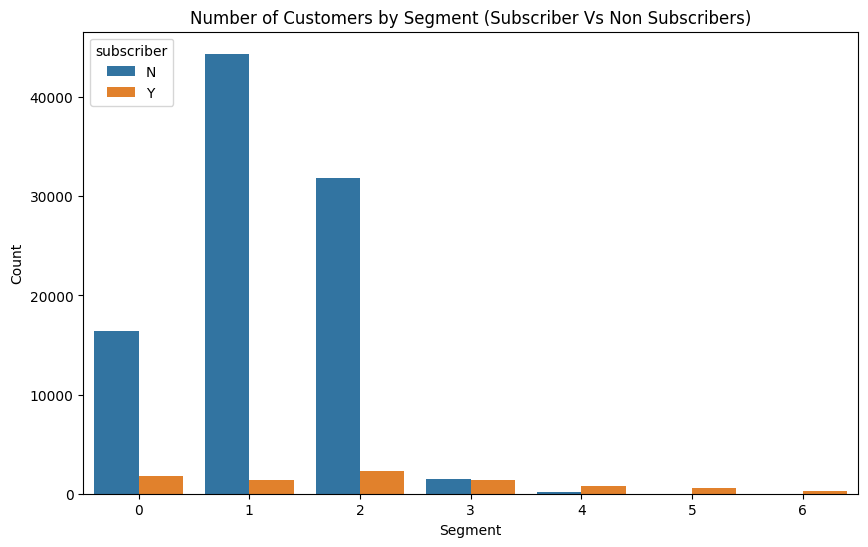

In [ ]:


# Group the data by segment and subscriber status, and count the number of customers
segment_counts = df.groupby(['Segment', 'subscriber']).size().reset_index(name='count')

# Plot the count plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='count', hue='subscriber', data=segment_counts)
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Number of Customers by Segment (Subscriber Vs Non Subscribers)')
plt.show()


In [ ]:
4 = 'Loyal Purchasers - purchase most often'
0 = 'Slipping - past customers who havent bought in awhile'
5 = 'Whales - Highest paying'
6 = 'Whales - Highest paying'
1 = 'Slipping - past customers who havent bought in awhile'
2 = 'New Customers'
3 = 'Faithful - Customers who return often, but do not spend a lot'

In [ ]:
# Create a 3D scatter plot
fig = px.scatter_3d(df, x='recency', y='frequency', z='revenue', color='Segment', log_x=False,log_y=True,log_z=True, width=1600, height=800)


# Set labels for the axes
fig.update_layout(scene=dict(
    xaxis_title='Recency',
    yaxis_title='Frequency',
    zaxis_title='Revenue'
))

# Show the plot
fig.show()